In [1]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from transformers import pipeline

- Load the customer reviews dataset


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_reviews.csv')
print(df.head())

                                              Review
0  Bought 2017 Optima Hybrid in November 17. It w...
1   You get a lot for your money and great perfor...
2   This car is amazing and have no complaints. Y...
3  At 11k now in a lease for 39 months and it onl...
4  I've owned BMW, Lexus, Mercedes-Benz in the la...


- Creating the data drame 'df' from car_reviews.csv.

In [10]:
duplicated = df.duplicated().sum()

print("Number of duplicates:", duplicated)

Number of duplicates: 34


In [11]:
null_values = df.isnull().sum()

print("Number of null values:")
print(null_values)

Number of null values:
Review    0
dtype: int64


In [13]:
df=df.drop_duplicates(keep='first')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5925 entries, 0 to 5958
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  5925 non-null   object
dtypes: object(1)
memory usage: 92.6+ KB


- word cloud to check the overall spread of words in each review


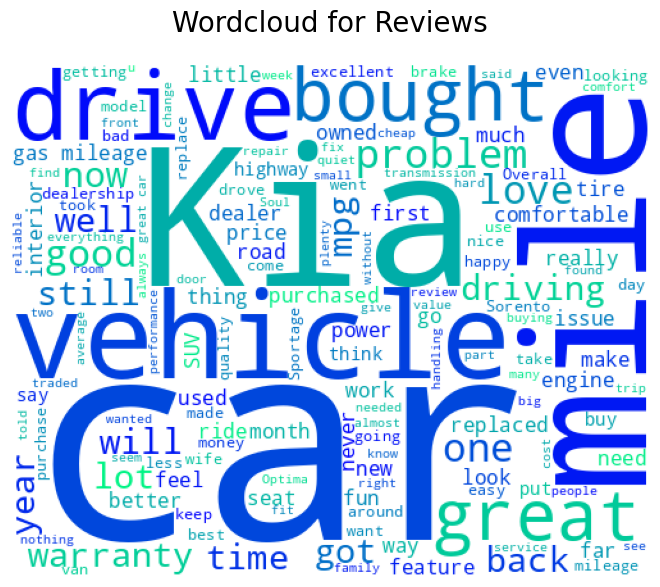

In [15]:

all_words = ''

# to extract most common words
for arg in df["Review"]:

    tokens = arg.split()

    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 400, background_color='white',
                min_font_size = 10, colormap="winter").generate(all_words)

# plot
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Wordcloud for Reviews", fontsize=20, y=1.05)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1)
plt.show()



- Plot the distribution of review lengths using plotly histogram


In [16]:
num_letters = df["Review"].apply(len)
# Distribution of review lengths
fig = px.histogram(num_letters,nbins=20,color_discrete_sequence= ["#30C3C4"],
                   title="Distribution of Characters",
                   labels={"value": "Number of Characters", "count": "Frequency"},
                    )
fig.update_layout(
    plot_bgcolor='#F3F4F7', width=700
)

# Show the plot
fig.show()

- Perform zero shot classification on the reviews and create a 'talk_about' column on 'reviews' dataframe.

In [19]:
reviews = df.copy()
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device = 0)

candidate_labels = ["driving experience", "features",
                    "value for money", "issues", "other"]

reviews['talks_about'] = reviews['Review'].apply(lambda x: zero_shot_classifier(x, candidate_labels)['labels'][0])

model.safetensors:  63%|######3   | 1.03G/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Initialize the sentiment analysis pipeline and Analyze sentiment for each review.


In [20]:
#
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device = 0)

reviews['sentiment'] = reviews['Review'].apply(lambda x: sentiment_analyzer(x, truncation=True)[0]['label'])

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

- Visualize the sentiment distribution

<ipython-input-21-e76946b4bf6a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




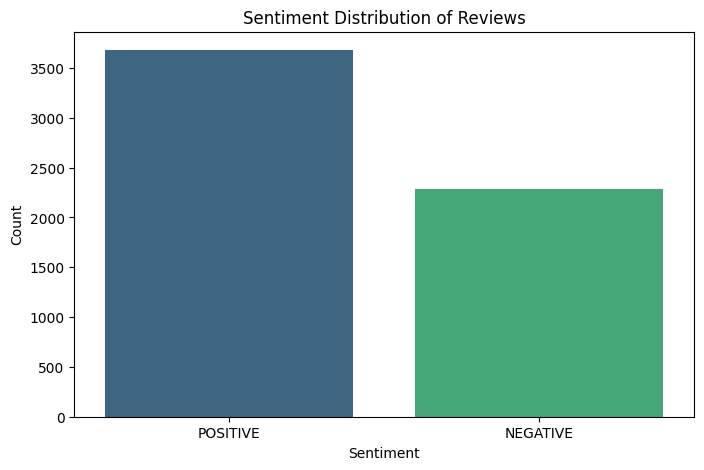

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=reviews, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

-  Visualize the distribution of review categories

<ipython-input-22-53bbe07a0b7d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




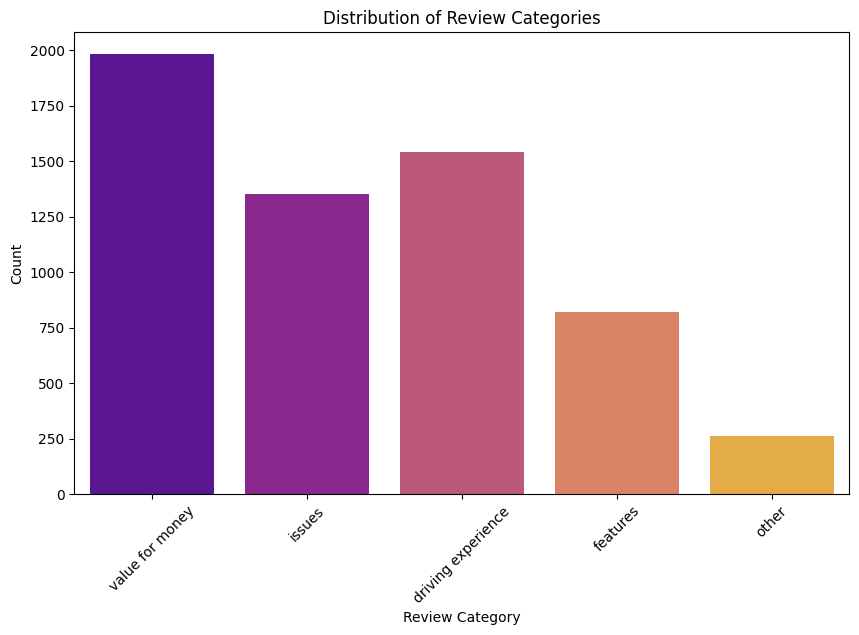

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=reviews, x='talks_about', palette='plasma')
plt.title('Distribution of Review Categories')
plt.xlabel('Review Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Visualize sentiment distribution across review categories

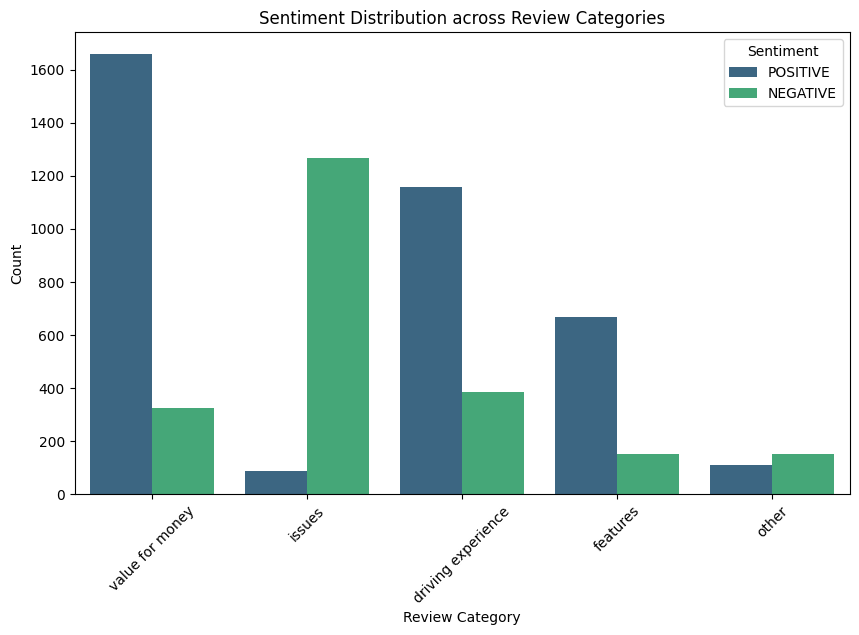

In [23]:

plt.figure(figsize=(10, 6))
sns.countplot(data=reviews, x='talks_about', hue='sentiment', palette='viridis')
plt.title('Sentiment Distribution across Review Categories')
plt.xlabel('Review Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

- Save the updated dataset with predictions to a new CSV file.


In [24]:
reviews.to_csv('updated_car_reviews.csv', index=False)

- Generate and display word clouds for each sentiment class.

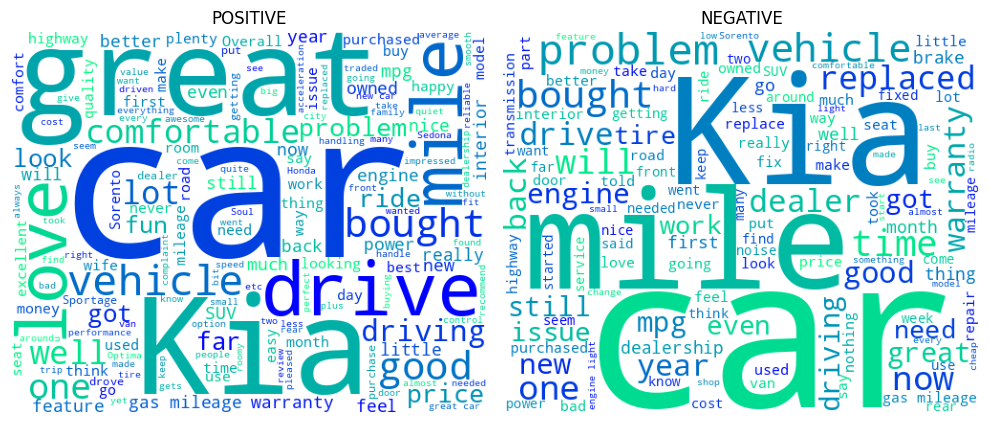

In [25]:
# Get all the unique classes in the dataset
classes = reviews['sentiment'].unique()

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs = axs.ravel()

# Iterate through each class
for i, class_name in enumerate(classes):
    # Get all the text for the current class
    class_text = reviews[reviews['sentiment'] == class_name]['Review'].str.cat(sep=' ')
    # Generate the wordcloud
    wordcloud = WordCloud(width = 500, height = 400,
                background_color='white',
                colormap="winter",
                min_font_size = 10).generate(class_text)
    # Plot the wordcloud
    axs[i].imshow(wordcloud)
    axs[i].set_title(f"{class_name}")
    axs[i].axis("off")
fig.tight_layout()
plt.show()